### Задача 2.2

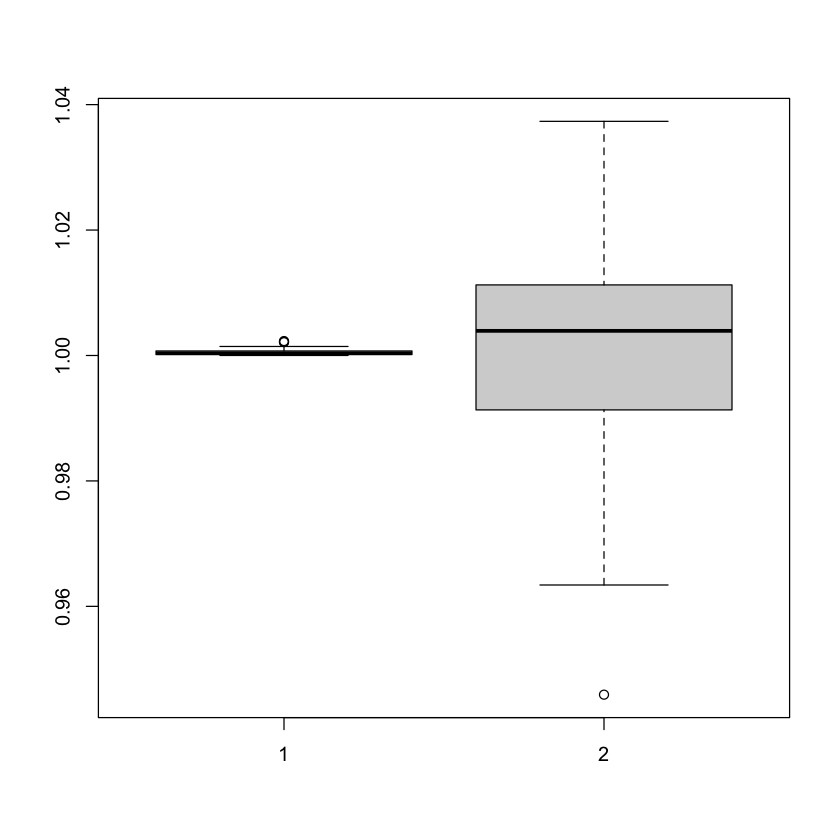

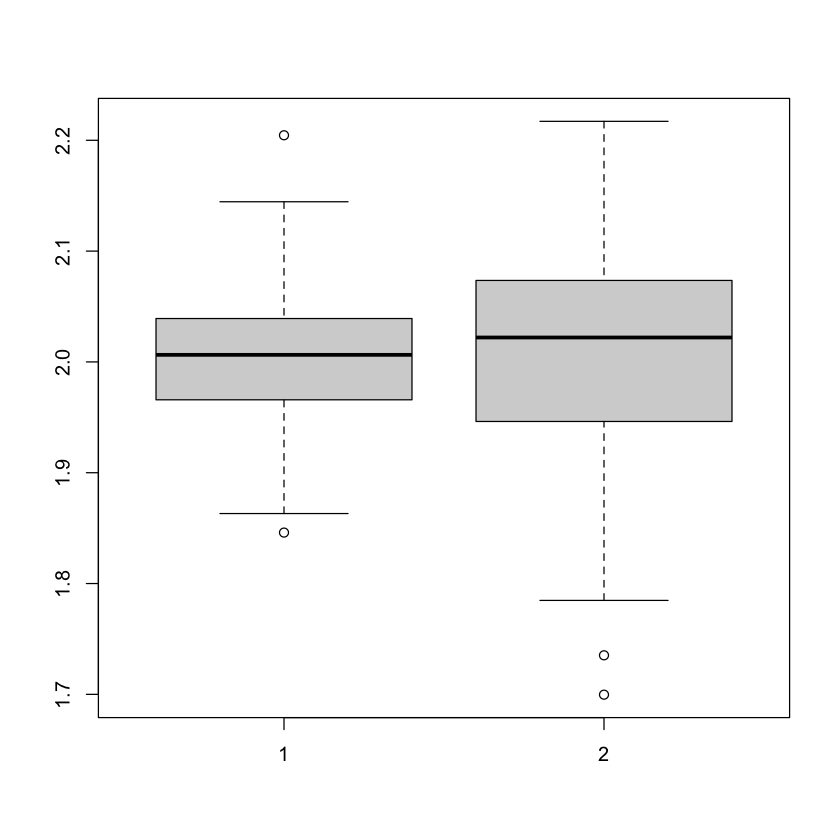

In [4]:
n=1000
nrep=100
mu1=rep(NA,nrep)
lambda1=rep(NA,nrep)
mu2=rep(NA,nrep)
lambda2=rep(NA,nrep)

mu_real = 1
lambda_real = 2

for (k in 1:nrep){
    x = rexp(n, rate = lambda_real)
    x = x + mu_real
    mu1[k] = min(x)
    lambda1[k] = 1 / (mean(x) - min(x))
    mu2[k] = mean(x) - sqrt(mean(x**2) - mean(x)**2)
    lambda2[k] = 1 / sqrt(mean(x**2) - mean(x)**2)


}

boxplot(mu1, mu2)
boxplot(lambda1, lambda2)

Получили, что первая оценка лучше, так как у нее меньше смещение и байес.

### Задача 3.3

In [6]:
library(fitdistrplus)

nrep=100
n=1000
a_mle=rep(NA,nrep)
a_mm=rep(NA,nrep)
b_mle=rep(NA,nrep)
b_mm=rep(NA,nrep)
alpha = 1
beta = 4

for (k in 1:nrep){
    x=rgamma(n, shape = beta, rate = alpha)
} 
res1=fitdist(x,"gamma",method="mle")
print(res1)
res2=fitdist(x,"gamma",method="mme")
print(res2)


Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
      estimate Std. Error
shape 4.079390 0.17548565
rate  0.998376 0.04570385


Fitting of the distribution ' gamma ' by matching moments 
Parameters:
       estimate
shape 4.0070446
rate  0.9806826


Оценка методом моментов вышла лучше для шейпа, но хуже для рейта

### Задача 4

In [3]:
library(bayesrules)

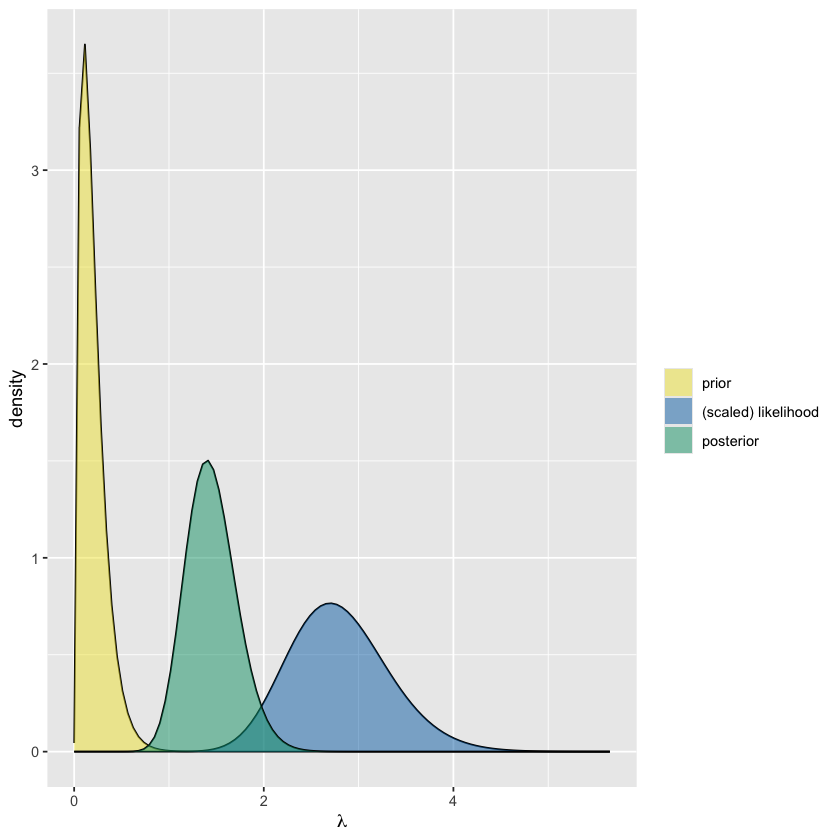

In [4]:
alpha = 2
beta = 10
n = 10
y = sum(rpois(n,lambda = 2))
plot_gamma_poisson(shape = alpha, rate = beta, sum_y = y,n = n, posterior = TRUE , likelihood = TRUE)

In [50]:
alpha0vec=seq(from=10,to=60,by=10)
beta0vec=seq(from=5,to=55,by=10)
n = 100
y = sum(rpois(n,lambda = 2))
theta_est=matrix(NA,nrow=length(alpha0vec),ncol=length(beta0vec))
for (i in 1:length(alpha0vec)){
  for (j in 1:length(beta0vec)){
    res = summarize_gamma_poisson(shape=alpha0vec[i],rate=beta0vec[j],sum_y = y,n = n)
    theta_est[i, j] = res$mean[2]
  }
}
print(theta_est)

         [,1]     [,2]  [,3]     [,4]     [,5]     [,6]
[1,] 1.933333 1.765217 1.624 1.503704 1.400000 1.309677
[2,] 2.028571 1.852174 1.704 1.577778 1.468966 1.374194
[3,] 2.123810 1.939130 1.784 1.651852 1.537931 1.438710
[4,] 2.219048 2.026087 1.864 1.725926 1.606897 1.503226
[5,] 2.314286 2.113043 1.944 1.800000 1.675862 1.567742
[6,] 2.409524 2.200000 2.024 1.874074 1.744828 1.632258


In [48]:
alpha0vec=seq(from=10,to=60,by=10)
beta0vec=seq(from=5,to=55,by=10)
n = 1000
y = sum(rpois(n,lambda = 2))
theta_est=matrix(NA,nrow=length(alpha0vec),ncol=length(beta0vec))
for (i in 1:length(alpha0vec)){
  for (j in 1:length(beta0vec)){
    res = summarize_gamma_poisson(shape=alpha0vec[i],rate=beta0vec[j],sum_y = y,n = n)
    theta_est[i, j] = res$mean[2]
  }
}
print(theta_est)

         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]
[1,] 2.012935 1.993103 1.973659 1.954589 1.935885 1.917536
[2,] 2.022886 2.002956 1.983415 1.964251 1.945455 1.927014
[3,] 2.032836 2.012808 1.993171 1.973913 1.955024 1.936493
[4,] 2.042786 2.022660 2.002927 1.983575 1.964593 1.945972
[5,] 2.052736 2.032512 2.012683 1.993237 1.974163 1.955450
[6,] 2.062687 2.042365 2.022439 2.002899 1.983732 1.964929


Как видно, при росте выборки постериорные становится все более похожим на лайкхуд, причем параметр 
ламбда находится довольно точно(для меньшей выборки это тоже верно)

In [47]:
alpha0vec=seq(from=10,to=60,by=10)
beta0vec=seq(from=5,to=55,by=10)
n = 10000
y = sum(rpois(n,lambda = 2))
theta_est=matrix(NA,nrow=length(alpha0vec),ncol=length(beta0vec))

for (i in 1:length(alpha0vec)){
  for (j in 1:length(beta0vec)){
    res = summarize_gamma_poisson(shape=alpha0vec[i],rate=beta0vec[j],sum_y = y,n = n)
    theta_est[i, j] = res$mean[2]
  }
}
print(theta_est)

         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]
[1,] 2.013893 2.011882 2.009875 2.007872 2.005874 2.003879
[2,] 2.014893 2.012881 2.010873 2.008869 2.006869 2.004873
[3,] 2.015892 2.013879 2.011870 2.009865 2.007865 2.005868
[4,] 2.016892 2.014878 2.012868 2.010862 2.008860 2.006862
[5,] 2.017891 2.015876 2.013865 2.011858 2.009856 2.007857
[6,] 2.018891 2.016875 2.014863 2.012855 2.010851 2.008851


Как видно, с увелечением n оценки сходятся к истинному значению, вне зависимоти от стартовой точки $\lambda$. Однако для меньших, стартовая точка имеет большое значение.

### Задача 5.2

In [13]:
library(mixtools)


mixtools package, version 2.0.0, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




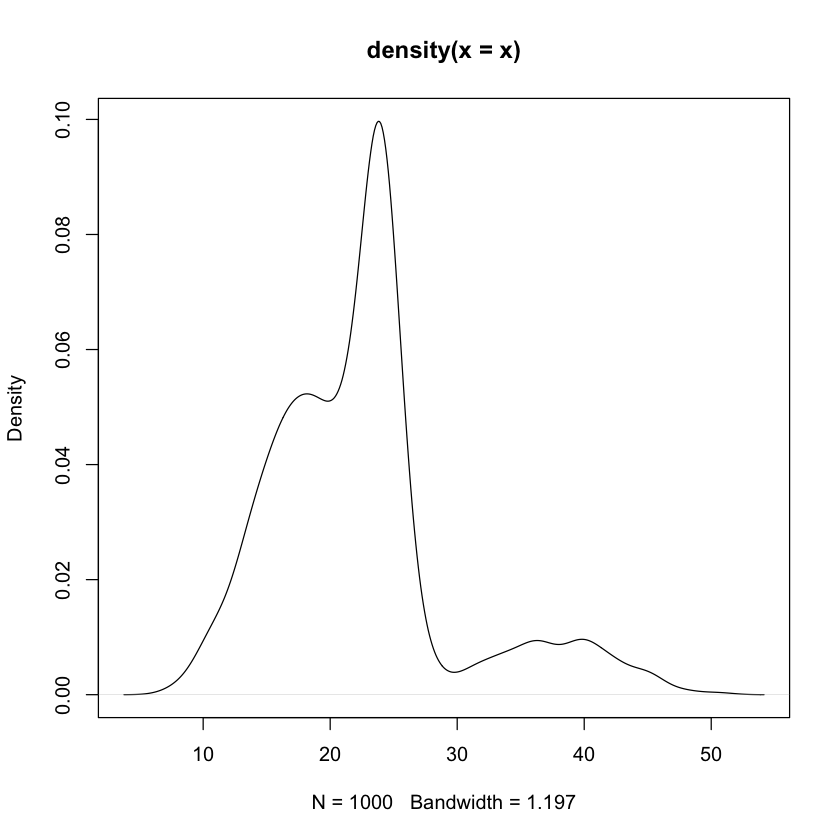

In [32]:
n = 1000
mu=sample(1:50,3,prob=rep(1/5,50))
sigma=sample(1:5,3,prob=rep(1/50,5))
alpha=c(0.1,0.3,0.6)
Y=sample(1:3,size=n,prob=alpha,replace=TRUE)
x=rep(NA,n)
for (k in 1:n){
  x[k]=rnorm(1,mean=mu[Y[k]],sd=sigma[Y[k]])
}
plot(density(x))

number of iterations= 20 
number of iterations= 120 
number of iterations= 773 
number of iterations= 852 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 122 


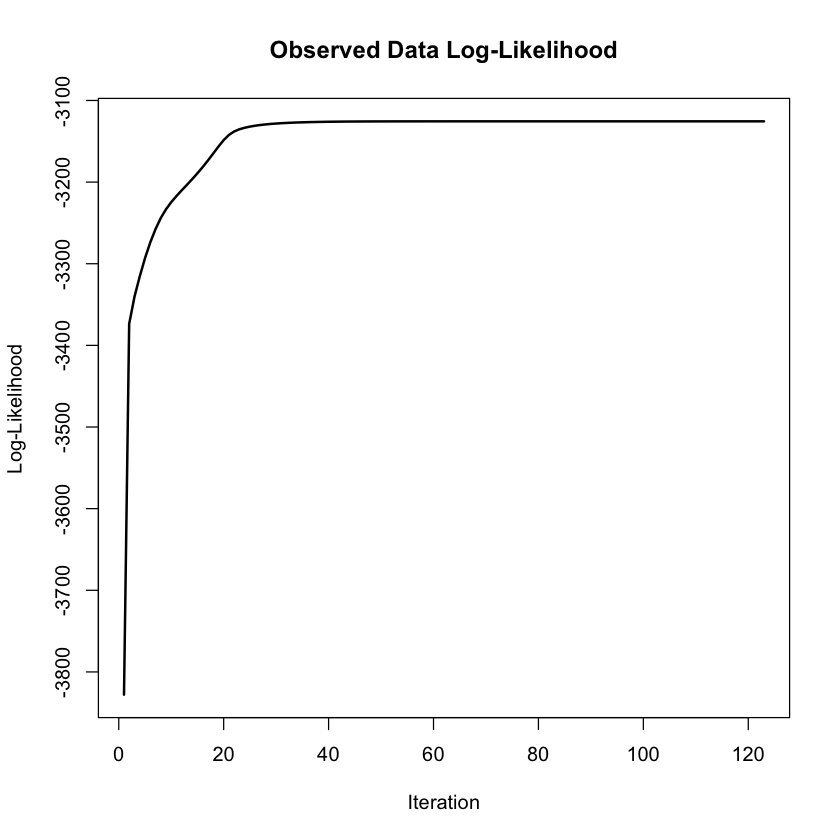

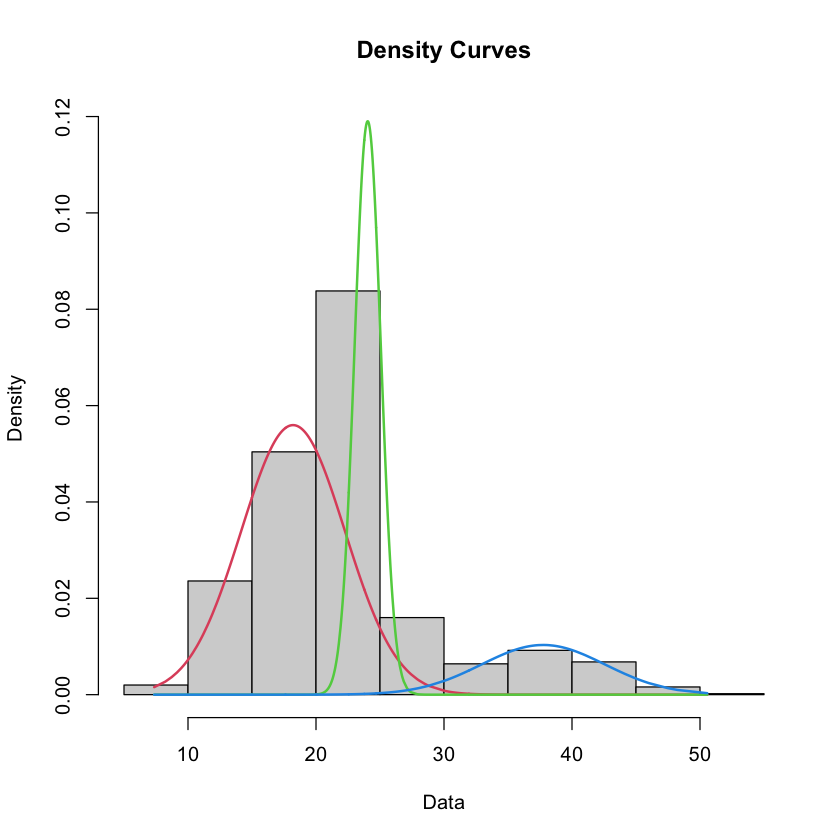

In [54]:
loglike.my = c(NA, 9)
for (k in 2:10){
    d=normalmixEM(x, k = k)
    loglike.my[k - 1] = d$loglik
}
d=normalmixEM(x, k = 3)
plot(d,density=TRUE)
#самое удачное по моему мнению тут - 3

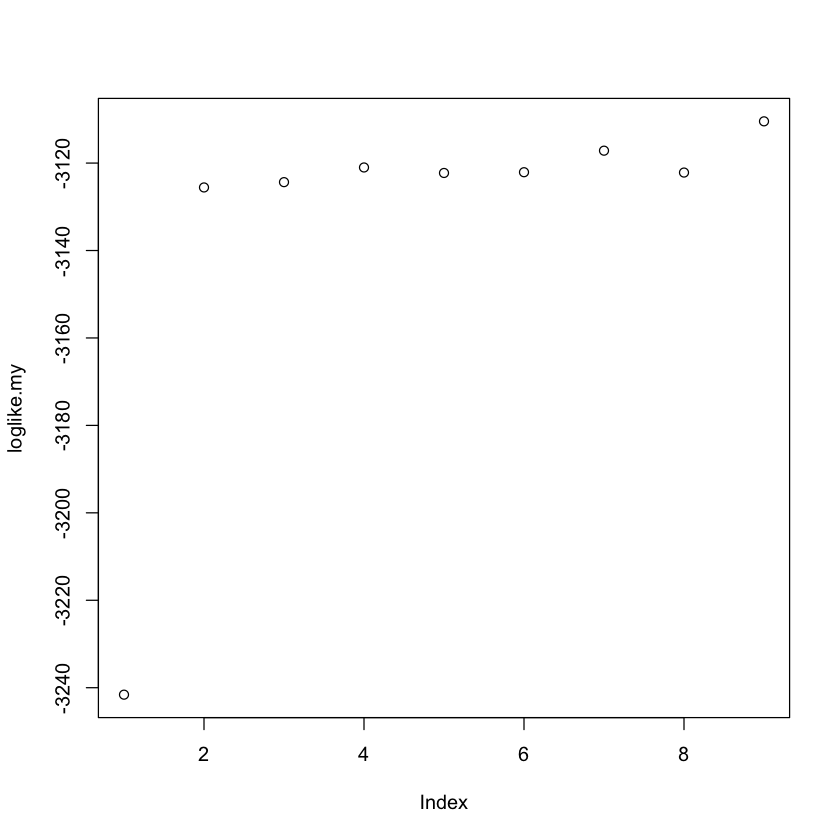

In [34]:
plot(loglike.my)

Как видно LL не падает, а растет, хотя мы очевидно перебрали с числом компонент

Попробуем взять другие стартовые значения

number of iterations= 107 


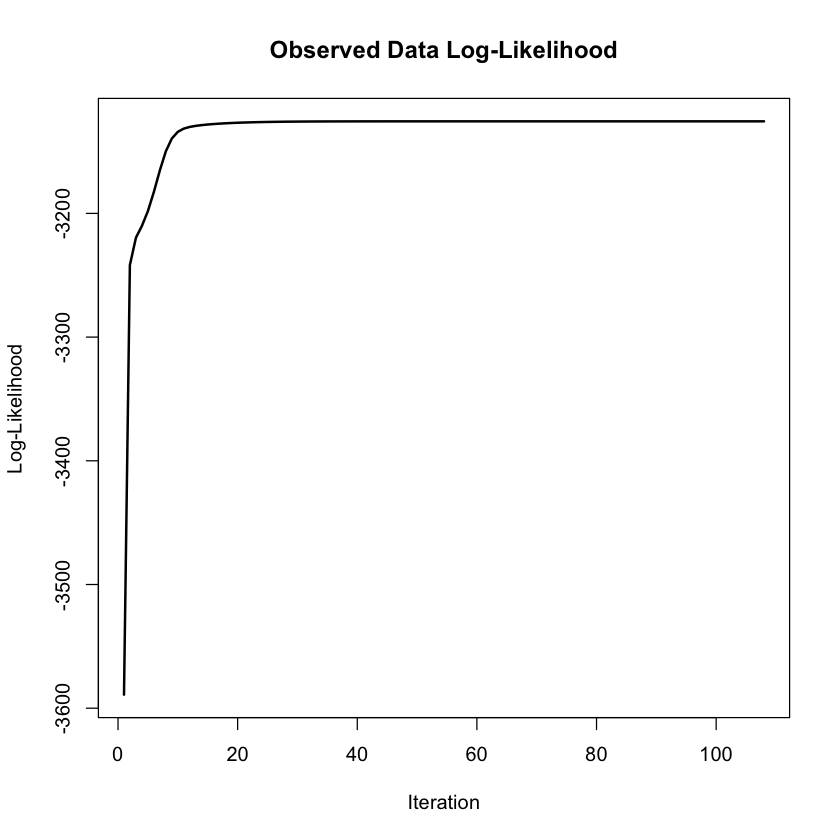

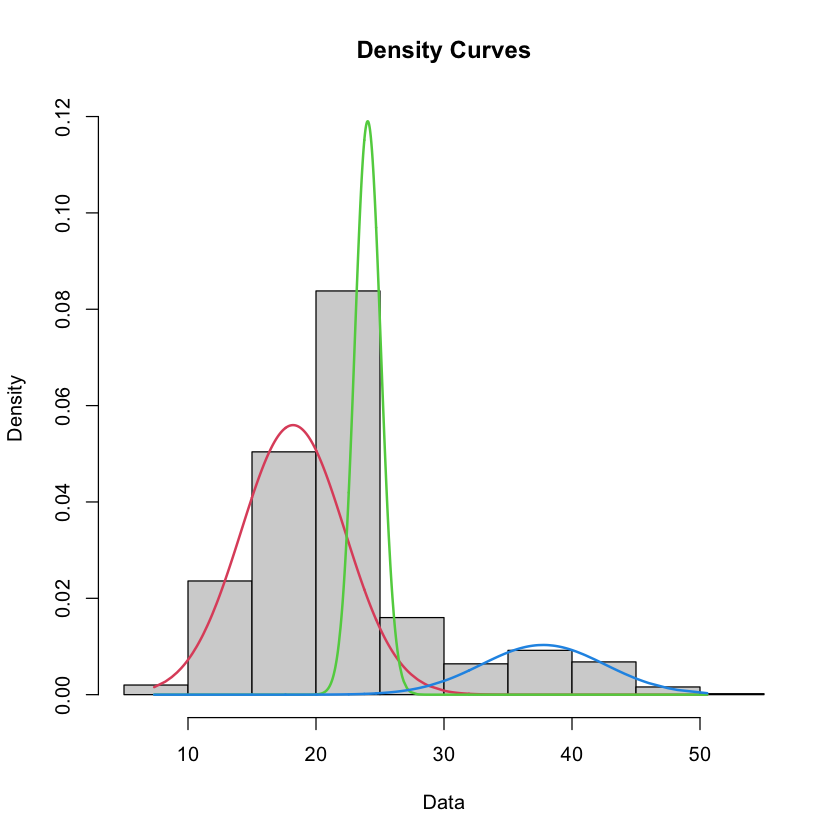

In [41]:
K = 3
mu0=rep(NA,K)
for (k in 1:K){
  mu0[k]=quantile(x,k/3)
}
sigma0=rep(NA,K)
for (k in 1:K){
  sigma0[k]=runif(1,min=0,max=sd(x))
}
alpha0=rep(1/3,3)
d=normalmixEM(x,k=3,mu=mu0,sigma=sigma0,lambda=alpha0)
plot(d,density=TRUE)

По итогу ничего особенно не изменилось, если взять что-то адекватное

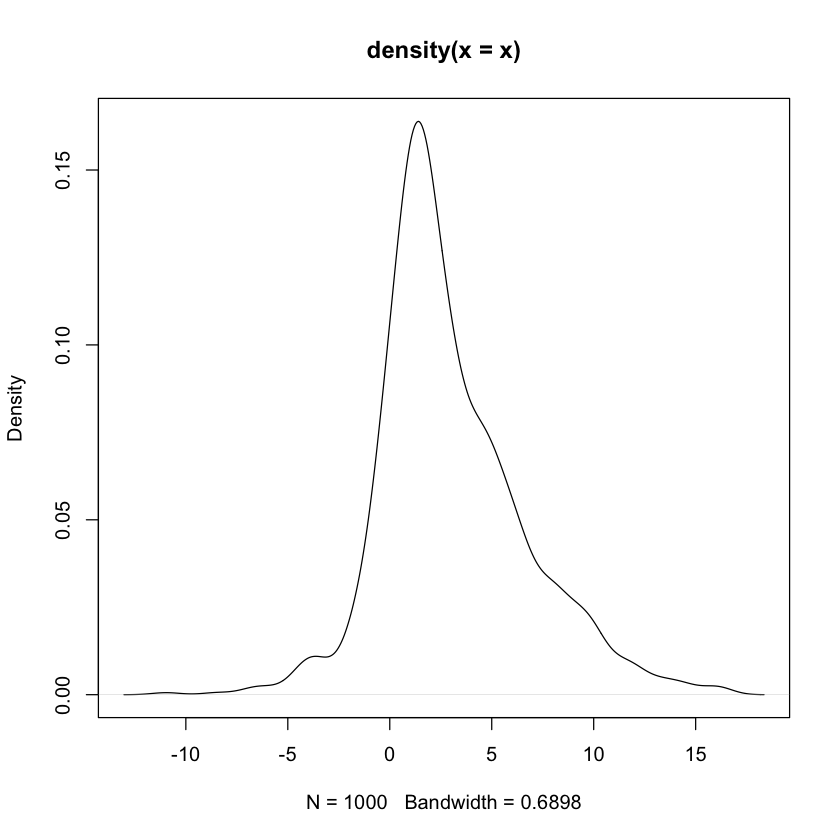

In [27]:
n = 1000
mu = c(1, 1.2, 4)
sigma=sample(1:5,3,prob=rep(1/5,5))
alpha=c(0.1,0.3,0.6)
Y=sample(1:3,size=n,prob=alpha,replace=TRUE)
x=rep(NA,n)
for (k in 1:n){
  x[k]=rnorm(1,mean=mu[Y[k]],sd=sigma[Y[k]])
}
plot(density(x))

number of iterations= 32 


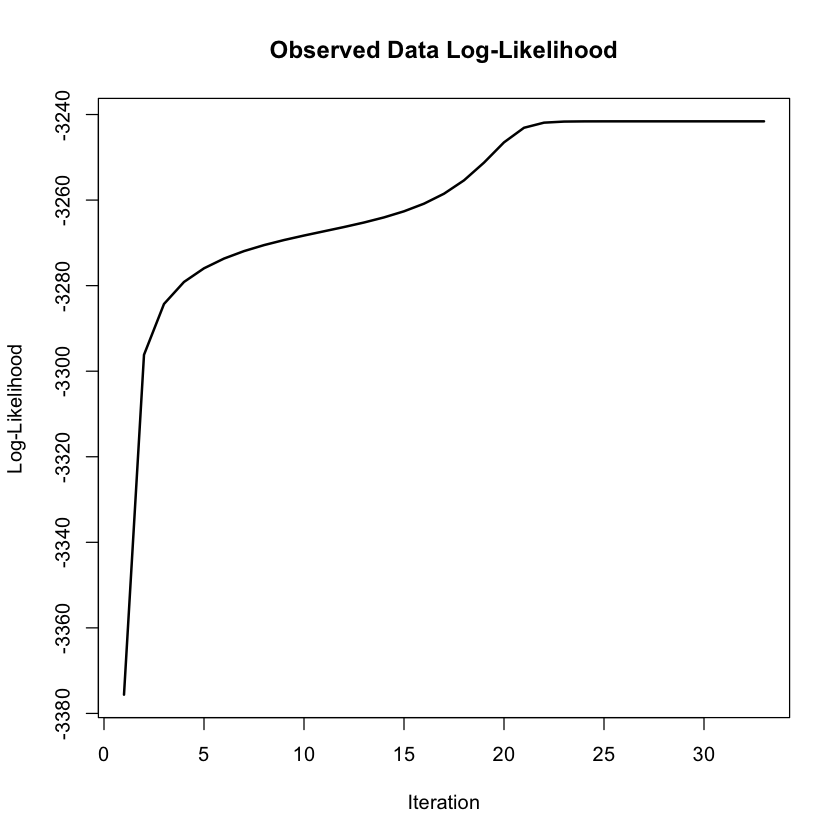

number of iterations= 109 


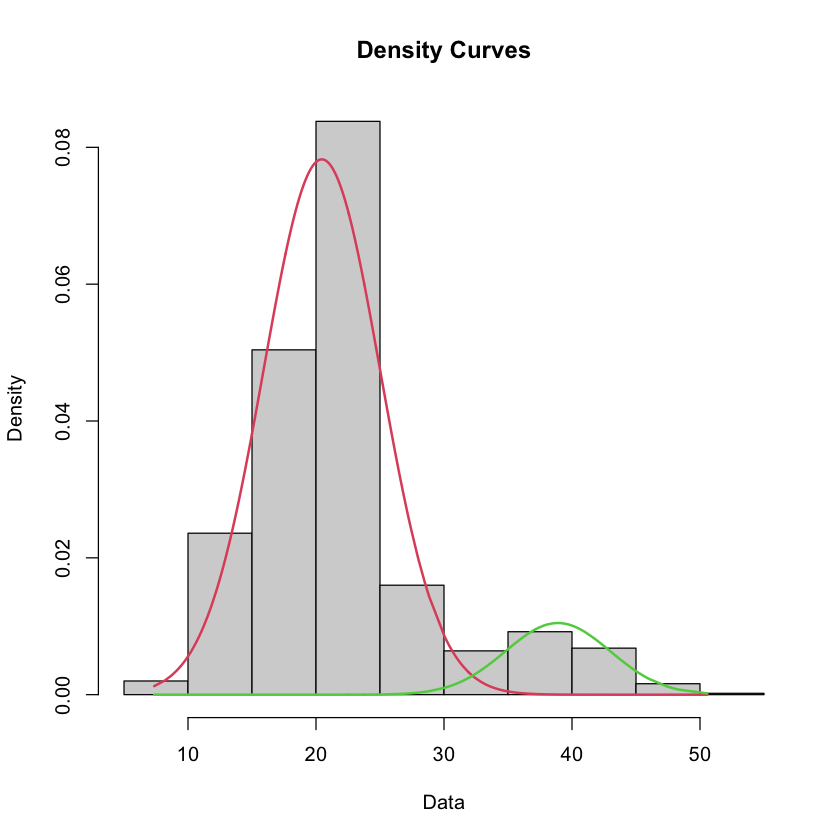

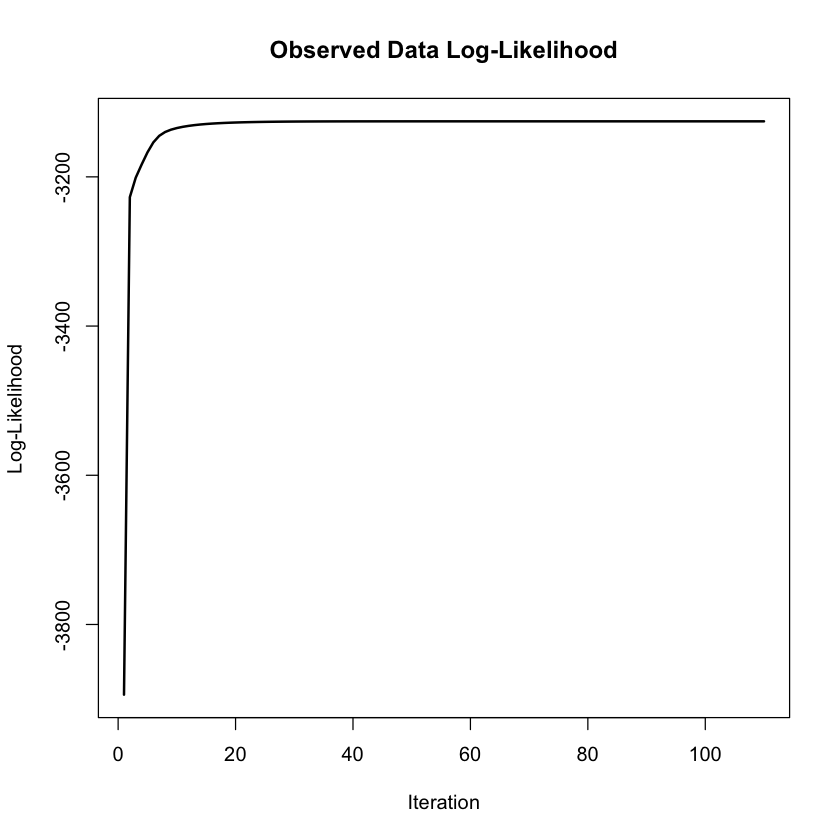

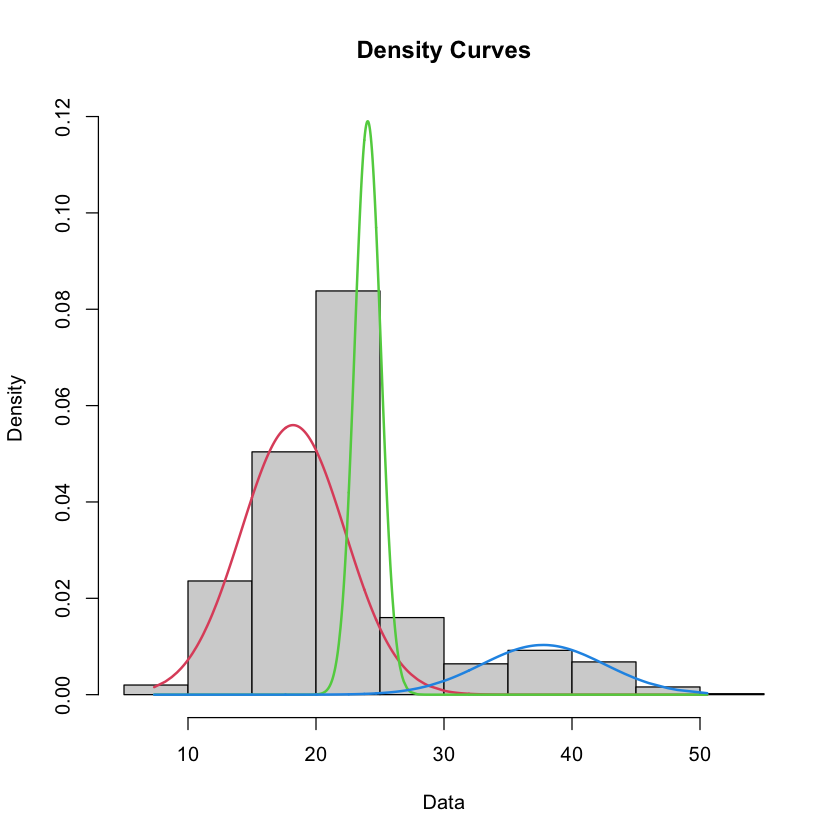

In [55]:
loglike.my = c(NA, 9)
for (k in 2:10){
    loglike.my[k - 1] = d$loglik
}
d=normalmixEM(x,k=2)
plot(d,density=TRUE)
d=normalmixEM(x,k=3)
plot(d,density=TRUE)

Если взять mu1 близким к mu2, то количество компонент сократить все равно не получается.(левая часть графика - очевидно скошена и не может быть промоделирована одним нормальным)

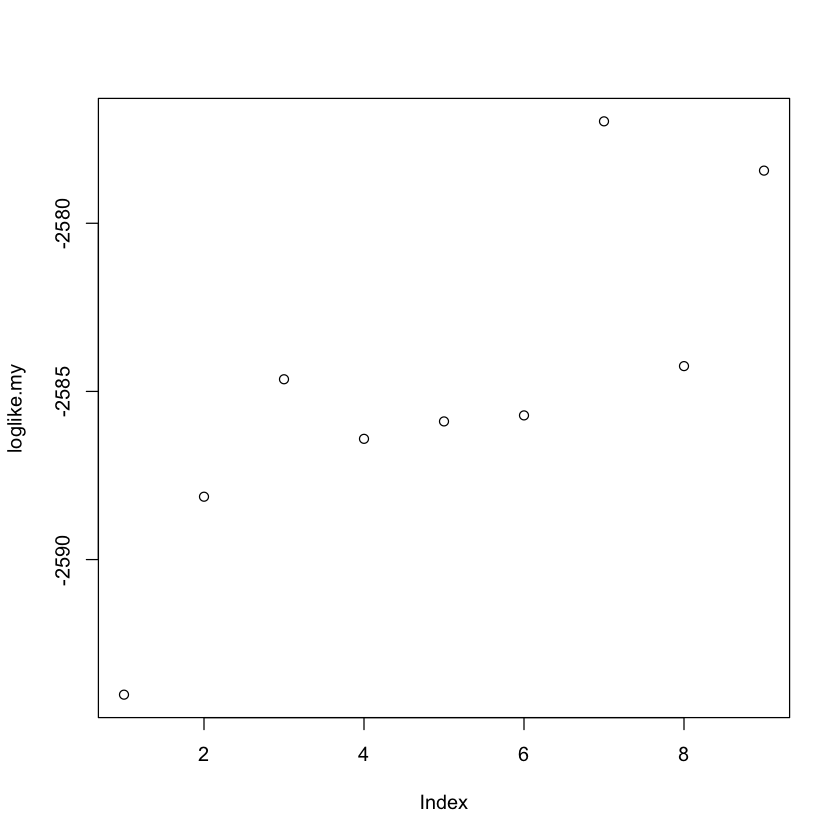

In [31]:
plot(loglike.my)

Опять видим ту же картину, с тем что LL не отражает реальной схожести с нашим распределением.
Отличие же в том, что тут разрыв между правдоподобиями выше.